In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:/Symbi/international-airline-passengers.csv",index_col=0)
df

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
...,...
1960-09,508.0
1960-10,461.0
1960-11,390.0


In [3]:
df1=df.rename({'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60':' passengers'},axis=1)
df1.isna().sum()

 passengers    1
dtype: int64

In [4]:
dd=df1.dropna()
dd

,passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0
...,...
1960-08,606.0
1960-09,508.0
1960-10,461.0


In [5]:
dd.describe()

,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0    passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2+ KB


In [7]:
import chart_studio.plotly as py

<AxesSubplot:xlabel='Month'>

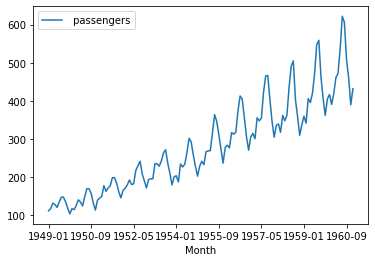

In [8]:
dd.plot()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

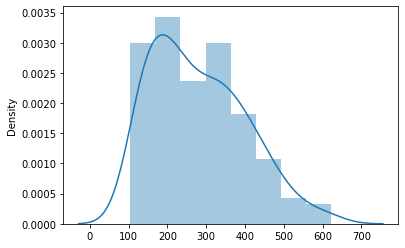

In [9]:
import seaborn as sns

sns.distplot(dd) #Dencity plot for single column


In [10]:
dd.columns

Index([' passengers'], dtype='object')

# CHECK DATA IS STATIONARY OR NOT

In [11]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dd)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
if (result[1]<0.05):
    print('Data is stationary')
else:
    print('Data is not stationary')

ADF Statistic: 0.815369
p-value: 0.991880
Data is not stationary


In [12]:
# Let’s do a quick log transform and differencing on dataset.

In [13]:
dd['Volumn1'] = np.log(dd)
dd

<ipython-input-13-fc1f783ec81d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['Volumn1'] = np.log(dd)


,passengers,Volumn1
Month,,
1949-01,112.0,4.718499
1949-02,118.0,4.770685
1949-03,132.0,4.882802
1949-04,129.0,4.859812
1949-05,121.0,4.795791
...,...,...
1960-08,606.0,6.406880
1960-09,508.0,6.230481
1960-10,461.0,6.133398


In [14]:
dd['Voldiff'] = dd['Volumn1'] - dd['Volumn1'].shift(8)
dd

<ipython-input-14-63fa544bd377>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['Voldiff'] = dd['Volumn1'] - dd['Volumn1'].shift(8)


,passengers,Volumn1,Voldiff
Month,,,
1949-01,112.0,4.718499,NaN
1949-02,118.0,4.770685,NaN
1949-03,132.0,4.882802,NaN
1949-04,129.0,4.859812,NaN
1949-05,121.0,4.795791,NaN
...,...,...,...
1960-08,606.0,6.406880,0.402993
1960-09,508.0,6.230481,0.197395
1960-10,461.0,6.133398,0.164690


In [15]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dd['Voldiff'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
if (result[1]<0.05):
    print('Data is stationary')
else:
    print('Data is not stationary')

ADF Statistic: -3.336619
p-value: 0.013319
Data is stationary


NOW DATA IS STAIIONARY FOR FORCASTING

In [16]:
GK=dd['Voldiff'].dropna()
GK

Month
1949-09    0.194156
1949-10    0.008439
1949-11   -0.238411
1949-12   -0.089128
1950-01   -0.050858
             ...   
1960-08    0.402993
1960-09    0.197395
1960-10    0.164690
1960-11   -0.071724
1960-12   -0.064972
Name: Voldiff, Length: 136, dtype: float64

In [17]:
from pmdarima import auto_arima
model_A=auto_arima(GK,start_P=1,start_q=1,max_p=5,max_q=5,m=12,start_p=0,seasonal=True,d=1,D=1,trace=True,error_action='ignore',
                  suppress_warning=True,stepwise=True)
print(model_A.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-359.118, Time=0.64 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-318.568, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-354.242, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-361.033, Time=0.17 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-340.203, Time=0.04 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-359.137, Time=0.31 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-356.888, Time=0.13 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.97 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-342.688, Time=0.08 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-359.040, Time=0.36 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=-359.037, Time=0.31 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-359.096, Time=0.21 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=-357.536, Time=0.80 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=-359.131, Time=0.57 sec

Best model:  ARIMA(0,1,

In [18]:
model_B=auto_arima(GK,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-154.936, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-15.850, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-104.038, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-2.014, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-124.864, Time=0.35 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-156.916, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-123.597, Time=0.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-131.885, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-154.931, Time=0.51 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-136.949, Time=0.17 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-130.827, Time=0.15 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 3.390 seconds


In [19]:
model_B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  136
Model:               SARIMAX(2, 0, 1)   Log Likelihood                  83.458
Date:                Sun, 11 Apr 2021   AIC                           -156.916
Time:                        23:55:45   BIC                           -142.353
Sample:                             0   HQIC                          -150.998
                                - 136                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0218      0.003      6.487      0.000       0.015       0.028
ar.L1          1.5437      0.063     24.642      0.000       1.421       1.666
ar.L2         -0.8128      0.048    -16.864      0.000      -0.907      -0.718
ma.L1         -0.8242      0.066    -12.424      0.000      -0.954      -0.694
sigma2         0.0169      0.003      6.654      0.000       0.012       0.022
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.32
Prob(Q):                              0.93   Prob(JB):                         0.31
Heteroskedasticity (H):               1.02   Skew:                             0.10
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# TRAIN THE MODEL

In [20]:
print(GK.head(2))
print(GK.tail(2))

Month
1949-09    0.194156
1949-10    0.008439
Name: Voldiff, dtype: float64
Month
1960-11   -0.071724
1960-12   -0.064972
Name: Voldiff, dtype: float64


In [21]:
train=GK.loc['1949-01':'1959-01']
test=GK.loc['1959-01':]

In [22]:
model_B.fit(train)

ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True)

In [23]:
model_A.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [24]:
#ARMA = MODEL_B
#ARIMA= MODEL_A


# PREDICTION

In [25]:
f1_forecast=model_A.predict(n_periods=24)
f1_forecast

array([-0.22847174, -0.1898472 , -0.20997513, -0.04622142,  0.26924089,
        0.51143145,  0.40790949,  0.20814574,  0.12950602, -0.15199195,
       -0.02489168, -0.01061028, -0.22714233, -0.18851779, -0.20864572,
       -0.04489201,  0.2705703 ,  0.51276086,  0.4092389 ,  0.20947515,
        0.13083543, -0.15066254, -0.02356227, -0.00928087])

In [26]:
f2_forecast=model_B.predict(n_periods=24)
f2_forecast

array([0.05246755, 0.10935656, 0.1481636 , 0.16230481, 0.15301803,
       0.12746303, 0.09564419, 0.06720292, 0.04895118, 0.04364645,
       0.0500811 , 0.06419832, 0.0807339 , 0.09484575, 0.10330441,
       0.10501925, 0.10089541, 0.09319384, 0.08466297, 0.07771672,
       0.07386592, 0.0735021 , 0.07601952, 0.08017538])

In [27]:
FC1=pd.DataFrame(f1_forecast,index=test.index,columns=['prediction'])
FC2=pd.DataFrame(f2_forecast,index=test.index,columns=['prediction'])

<AxesSubplot:xlabel='Month'>

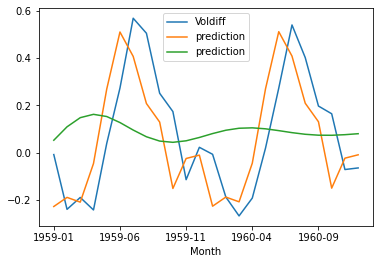

In [28]:
pd.concat([test,FC1,FC2],axis=1).plot()

<AxesSubplot:xlabel='Month'>

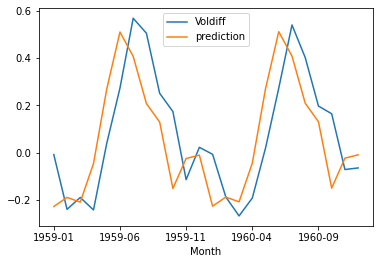

In [29]:
pd.concat([test,FC1],axis=1).plot()

<AxesSubplot:>

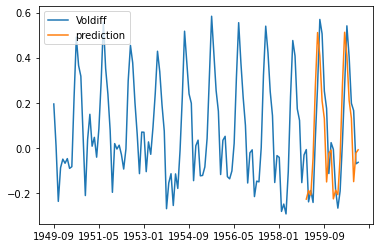

In [30]:
pd.concat([GK,FC1],axis=1).plot()

In [31]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test,f1_forecast)
print("MSE is :",mse)
print("RMSE is :",np.sqrt(mse))

MSE is : 0.03348164122803376
RMSE is : 0.18297989296104028


In [32]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(test,f2_forecast)
print("MSE is :",mse)
print("RMSE is :",np.sqrt(mse))

MSE is : 0.06992895036828453
RMSE is : 0.2644408258349768


CONCLUSION : WE ANALYZED THE MODELS BY MATHEMATICALLY AND STATISTICALLY MODEL_A IS BEST FIT MODEL FOR FEATURE FORCASTING AS
            COMPARE TO OTHER MODELS.
                MODEL_A GIVE THE MSE=0.03 & RMSE=0.18 WHICH IS VERY GOOD